Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


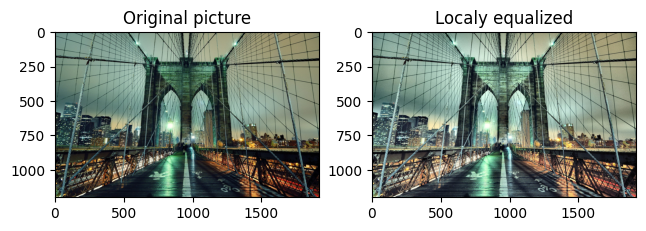

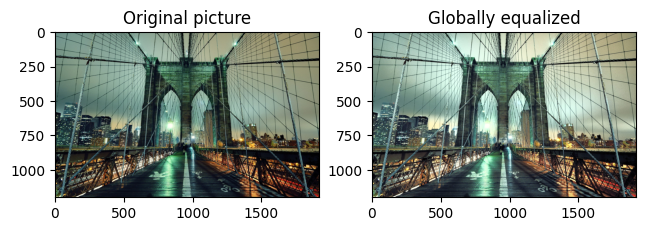

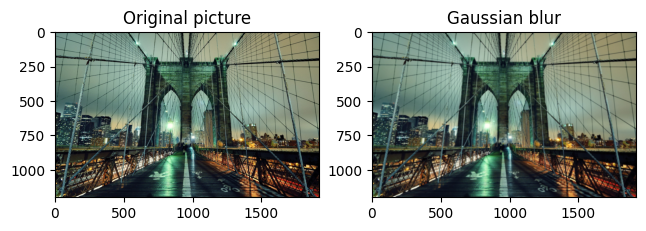

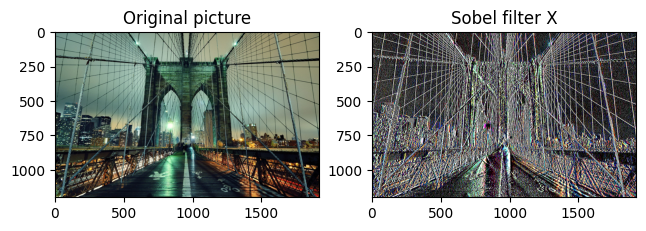

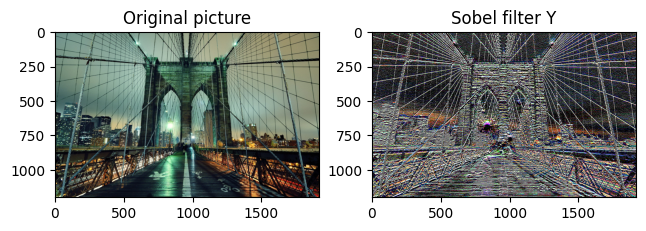

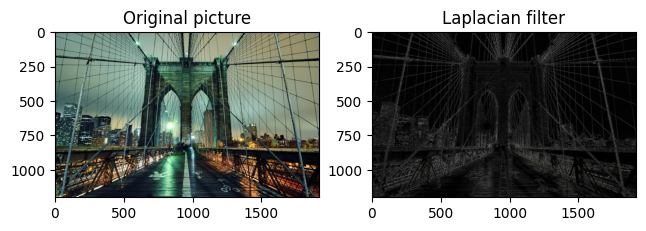

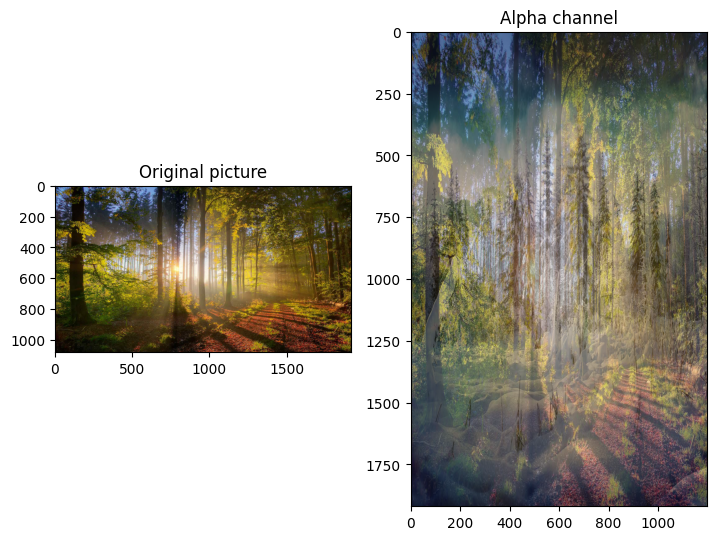

In [2]:
import tkinter as tk
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import (
    FigureCanvasTkAgg, NavigationToolbar2Tk)
from matplotlib.figure import Figure
import numpy as np
import cv2

def local_equalize_histogram(img_name):
    img = cv2.imread(img_name)
    img_YUV = cv2.cvtColor(img, cv2.COLOR_BGR2YUV) # яркость (Y) и два цветоразностных компонента (U и V)
  
    n = len(img_YUV)
    m = len(img_YUV[0])
    Y = []
    U = []
    V = []
    for i in range(n):
        for j in range(m): 
            Y.append(img_YUV[i][j][0])
            U.append(img_YUV[i][j][1])
            V.append(img_YUV[i][j][2])

    Y = np.array(Y)
    U = np.array(U)
    V = np.array(V)

    Y = np.reshape(Y, (n, m))
    U = np.reshape(U, (n, m))
    V = np.reshape(V, (n, m))
    # https://docs.opencv.org/master/d5/daf/tutorial_py_histogram_equalization.html
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    Y = clahe.apply(Y)
    
    img = cv2.merge([Y, U, V])
    return cv2.cvtColor(img, cv2.COLOR_YUV2BGR)

def equalize_histogram(img_name):
    img = cv2.imread(img_name)
    img_YUV = cv2.cvtColor(img, cv2.COLOR_BGR2YUV) 
  
    n = len(img_YUV)
    m = len(img_YUV[0])
    Y = []
    U = []
    V = []
    for i in range(n):
        for j in range(m): 
            Y.append(img_YUV[i][j][0])
            U.append(img_YUV[i][j][1])
            V.append(img_YUV[i][j][2])

    Y = np.array(Y)
    U = np.array(U)
    V = np.array(V)

    Y = np.reshape(Y, (n, m))
    U = np.reshape(U, (n, m))
    V = np.reshape(V, (n, m))

    Y = cv2.equalizeHist(Y)
    
    img = cv2.merge([Y, U, V])
    return cv2.cvtColor(img, cv2.COLOR_YUV2BGR)

def gaussian_blur(img_name):
    img = cv2.imread(img_name)
    return cv2.GaussianBlur(img, (11, 11), 0)
# https://docs.opencv.org/3.4/d2/d2c/tutorial_sobel_derivatives.html
def sobel_filter_x(img_name):
    img = cv2.imread(img_name)
    return cv2.Sobel(img, 2, 1, 0, ksize = 5)

def sobel_filter_y(img_name):
    img = cv2.imread(img_name)
    return cv2.Sobel(img, 2, 0, 1, ksize = 5)
# https://docs.opencv.org/3.4/d5/db5/tutorial_laplace_operator.html
def laplacian_filter(img_name):
    img = cv2.imread(img_name)
    return cv2.Laplacian(img, 2)

def alpha_channel(image_name1, image_name2, alpha):
    img1 = cv2.imread(image_name1)
    img2 = cv2.imread(image_name2)

    h = max(len(img1), len(img2))
    w = max(len(img1[0]), len(img2[0]))

    img1 = cv2.resize(img1, (h, w), interpolation = cv2.INTER_CUBIC)
    img2 = cv2.resize(img2, (h, w), interpolation = cv2.INTER_CUBIC)

    return cv2.addWeighted(img1, alpha, img2, 1 - alpha, 0)

class BaseWindow(tk.Tk):
    def __init__(self, img1, str1, img2, str2):
        super().__init__()
        self.geometry("750x750")
        self.title("Использование библиотеки TKinter - построение графиков")
        canvas = tk.Canvas(self, width = 0, height = -10)
        canvas.pack()
        fig, ax = plt.subplots(1, 2, figsize=(25, 50))

        ax[0].imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
        ax[0].set_title(str1)

        ax[1].imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
        ax[1].set_title(str2) 
       
        canvas = FigureCanvasTkAgg(fig, master=self)
        canvas.get_tk_widget().pack()        

if __name__ == "__main__":
    img_name = "bruklinskij-most.jpg"
    img = cv2.imread(img_name)
    # Локальное выравнивание гистограммы
    local_equalized_img = local_equalize_histogram(img_name)
    BaseWindow(img, 'Original picture', local_equalized_img, 'Localy equalized').mainloop()
    # Выравнивание гистограммы
    globally_equalized_img = equalize_histogram(img_name)
    BaseWindow(img, 'Original picture', globally_equalized_img, 'Globally equalized').mainloop()
    # Гауссовское размытие
    blured_img = gaussian_blur(img_name)
    BaseWindow(img, 'Original picture', blured_img, 'Gaussian blur').mainloop()
    # Фильтр Собеля по оси X
    sobel_x_img = sobel_filter_x(img_name)
    BaseWindow(img, 'Original picture', sobel_x_img, 'Sobel filter X').mainloop()
    # Фильтр Собеля по оси Y
    sobel_y_img = sobel_filter_y(img_name)
    BaseWindow(img, 'Original picture', sobel_y_img, 'Sobel filter Y').mainloop()
    # Фильтр Лапласа
    laplacian_img = laplacian_filter(img_name)
    BaseWindow(img, 'Original picture', laplacian_img, 'Laplacian filter').mainloop()
    # Альфа канал
    img = cv2.imread("summer.jpg")
    alpha_channel_img = alpha_channel("summer.jpg", "winter.jpg", 0.6)
    BaseWindow(img, 'Original picture', alpha_channel_img, 'Alpha channel').mainloop()
    